![Drugs][1]
[1]: https://userscontent2.emaze.com/images/be06df67-79a3-4306-b063-41b28c4e48b5/df3118a7525eadc773930e507c09b54c.jpg

In [45]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [46]:
def percentage_use(ds,start = 0 , slice = False):
  percentage_use = []
  for i in ds.columns.to_list()[2:28:2]:
    sum_people = 0
    for j in range(start,start + len(ds),1):
      sum_people += ds['n'][j] * (ds[i][j] * 0.01)
    if (not slice):
      percentage_use.append(float(100*sum_people / sum(ds['n'])))
    else:
      percentage_use.append(sum_people)

  return percentage_use


In [47]:
drugs = pd.read_csv('drug-use-by-age.csv')
plt.style.use('seaborn-talk')

for i in drugs:
  for j in range(len(drugs[i])):
    if (drugs[i][j] == '-'):
      try:
        drugs[i][j] = (float(drugs[i][j-1])+float(drugs[i][j+1]))/2
      except:
        if j == 16:
          drugs[i][j] = float(drugs[i][j-1])/2
        elif j == 0:
          drugs[i][j] = float(drugs[i][j+1])/2
  
drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]] = drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]].astype('float')

drugs.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [48]:
use_drugs = pd.DataFrame(columns = ['drugs','Percentage of use','Total'], index = range(0, 13))
use_drugs['drugs'] = drugs.columns.to_list()[2:28:2]
use_drugs['drugs'] = use_drugs['drugs'].apply(lambda x: x.split('-')[0]) 

use_drugs['Percentage of use'] = percentage_use(drugs)
use_drugs = use_drugs.sort_values('Percentage of use')
use_drugs['Total'] = [100.0]*len(use_drugs['drugs'])
use_drugs

,drugs,Percentage of use,Total
12,sedative,0.276131,100.0
3,crack,0.319082,100.0
4,heroin,0.353919,100.0
11,meth,0.376077,100.0
8,oxycontin,0.897349,100.0
6,inhalant,1.259881,100.0
10,stimulant,1.811006,100.0
2,cocaine,2.161750,100.0
9,tranquilizer,2.759050,100.0
5,hallucinogen,3.084273,100.0


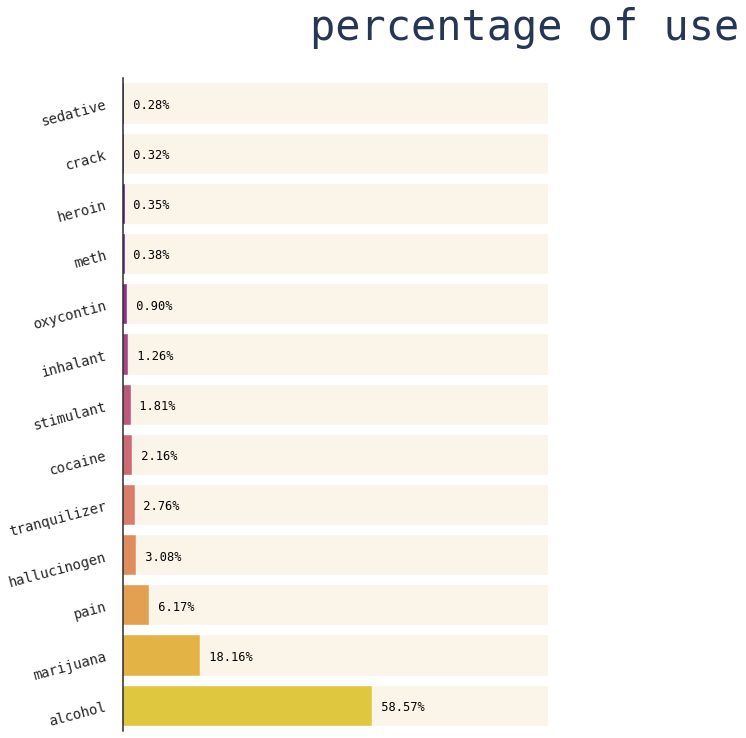

In [49]:
plt.figure(figsize=(8,12))
sns.set_style("white")
plt.title('percentage of use', fontsize = 42, fontname = 'monospace', x = 0.9, y = 1.05, color = '#283655')
a = sns.barplot(data = use_drugs, x = 'Total', y = 'drugs', color = 'oldlace')
b = sns.barplot(data = use_drugs, x = 'Percentage of use', y = 'drugs', color = 'darkred',palette='plasma')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, rotation = 15)
plt.ylabel('')
plt.xlabel('')


a.spines['left'].set_linewidth(1.5)
a.spines['top'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.spines['right'].set_visible(False)

k = 0.1
for i in use_drugs['Percentage of use']:
  plt.text(i + 0.4,k,f'{i: .2f}%', color= 'black', fontname='monospace')
  k = k+ 1.0
 

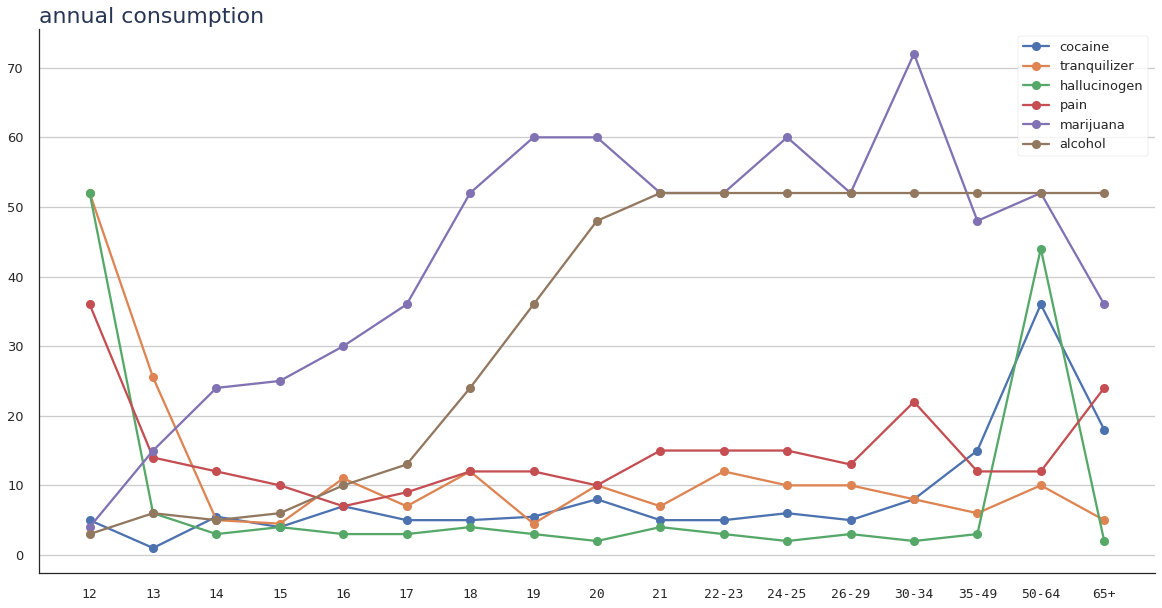

In [50]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

drugs_main = use_drugs.tail(6)["drugs"]
drugs_main = list(drugs_main[:])
drugs_main = [x+'-frequency' for x in drugs_main]
drugs_main[3] = 'pain-releiver-frequency'
plt.grid(axis='y')

j = 0
for i in drugs_main:
  plt.plot(drugs['age'],drugs[i], label = drugs_main[j].split('-')[0], marker = 'o')
  j = j+1

plt.title('annual consumption',fontsize = 22, color = '#283655', loc='left')

plt.xticks(fontname = 'monospace')
plt.legend()
plt.show()


In [51]:
drugs_minor = drugs.head(6)
drugs_minor

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [52]:
use_drugs_minor = pd.DataFrame(columns=['drugs','percentage of use','Total'],index=range(0,13))
use_drugs_minor['drugs'] = drugs_minor.columns.to_list()[2:28:2]
use_drugs_minor['drugs'] = use_drugs_minor['drugs'].apply(lambda x: x.split('-')[0])

use_drugs_minor['percentage of use'] = percentage_use(drugs_minor)
use_drugs_minor = use_drugs_minor.sort_values('percentage of use')
use_drugs_minor['Total'] = [100.0]*len(use_drugs_minor['drugs'])

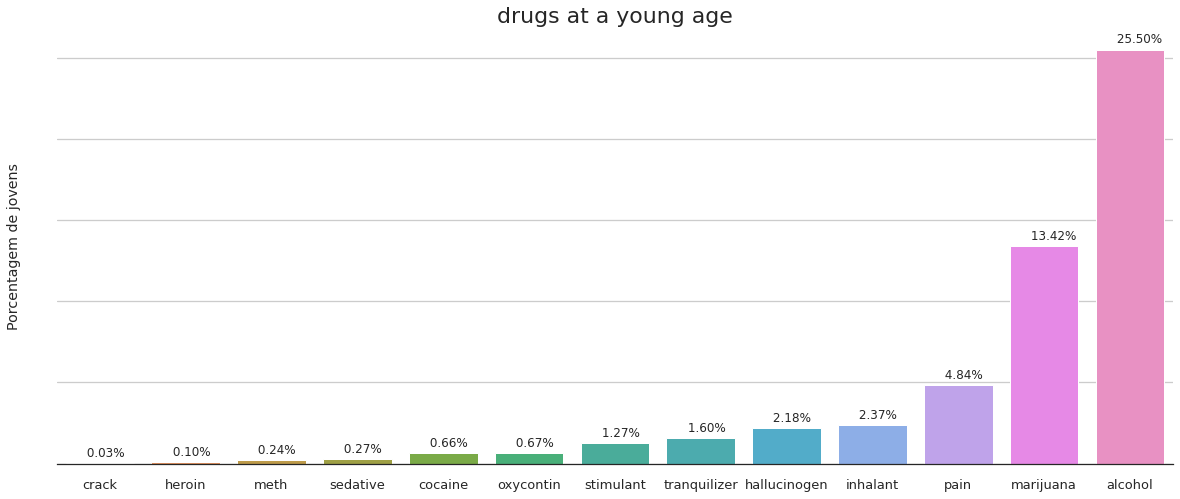

In [53]:
fig, ax = plt.subplots(figsize=(20,8))

sns.set_theme(style="whitegrid")
plt.title('drugs at a young age', fontsize = 22)
a = sns.barplot(x = 'drugs', y = 'percentage of use', data = use_drugs_minor)
plt.ylabel('Percentage of minors')
plt.xlabel('')

plt.yticks(color = 'white')
sns.despine(left=True)
ax.grid(axis='y')

k = -0.2
for i in use_drugs_minor['percentage of use']:
  plt.text(k,i+0.4,f'{i: .2f}%')
  k = k+ 1.0

plt.show()